In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
def transform_features(df):
    df.drop(['SERV_AREA_ID','ApptDate','har','DEPARTMENT_NAME',
            'DEPARTMENT_ID','Smoker','Hispanic','Language','pat_id','DepSpecialty'],axis=1,inplace=True)
    df = df[df.Status != 'Scheduled']
    df = df[df.LeadDays > 0]
    df = simplify_lead(df)
    df = simplify_bmi(df)
    df = simplify_ages(df)
    df.Religion = df.Religion.fillna('Unknown')
    df.Race = df.Race.fillna('Patient Declined')
    df.Status = df.Status.map({'Completed':0,'No Show':1})
    df.rename(columns={'Status':'NoShow'},inplace=True)
    return df

def simplify_lead(df):
    
    bins = (0,9,22,52,10000)
    group_names = ['1_Quartile','2_Quartile','3_Quartile','4_Quartile']
    categories = pd.cut(df.LeadDays,bins,labels=group_names)
    df.LeadDays = categories
    return df

def simplify_bmi(df):
    df.BMI = df.BMI.fillna(-1)
    bins = (-10,0,23,28,35,10000)
    group_names = ['Unknown','1_Quartile','2_Quartile','3_Quartile','4_Quartile']
    categories = pd.cut(df.BMI,bins,labels=group_names)
    df.BMI = categories
    return df

def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

df = pd.read_csv('FMtest.csv')
df = transform_features(df)
df = df[df['BMI'].notnull()]

In [16]:
def split_set(df):
    msk = np.random.rand(len(df)) < 0.8
    train = df[msk]
    test = df[~msk]
    return train, test
    
#train, test = split_set(df)

In [17]:
from sklearn import preprocessing
def encode_features(_df):#df_train, df_test):
    features = ['DayOfWeek','LeadDays','Age','Race',
                'Religion','BMI']
    #df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        #le = le.fit(df_combined[feature])
        le = le.fit(_df[feature])
        _df[feature] = le.transform(_df[feature])
        #df_test[feature] = le.transform(df_test[feature])
    return _df

#train, test = encode_features(train, test)
df = encode_features(df)

In [18]:
df.corr()

,NoShowCount,NoShow,ApptHour,DayOfWeek,ApptMonth,PCP,Referral,LeadDays,csn,ApptChanged,isReschedule,Age,Sex,Race,Married,Religion,BMI
NoShowCount,1.000000,0.230989,0.044971,0.000644,0.008417,-0.087891,-0.074372,-0.057041,0.039520,-0.075838,-0.007841,-0.001983,0.012453,-0.079797,-0.074343,0.015911,0.239254
NoShow,0.230989,1.000000,-0.000263,0.015064,0.016606,-0.156878,-0.061784,0.095194,-0.048909,-0.249493,-0.026161,0.020150,0.031705,-0.051340,-0.062497,0.032825,0.226222
ApptHour,0.044971,-0.000263,1.000000,-0.039154,0.007867,0.029340,-0.026733,-0.001998,0.020296,-0.126292,0.038171,0.008181,0.015263,0.056947,0.002907,0.025686,0.006929
DayOfWeek,0.000644,0.015064,-0.039154,1.000000,-0.021283,0.007158,0.003432,-0.004223,0.016738,0.001156,-0.009283,-0.002651,-0.002051,0.001330,-0.007460,-0.016200,-0.003812
ApptMonth,0.008417,0.016606,0.007867,-0.021283,1.000000,-0.068405,-0.043439,0.006903,-0.318720,-0.013854,0.009306,-0.006089,-0.013234,0.005299,0.006922,0.006780,0.013579
PCP,-0.087891,-0.156878,0.029340,0.007158,-0.068405,1.000000,-0.062269,-0.155121,0.136292,-0.179472,-0.011406,0.012420,-0.028803,0.029955,0.022158,0.005559,-0.038864
Referral,-0.074372,-0.061784,-0.026733,0.003432,-0.043439,-0.062269,1.000000,0.099033,0.073582,0.187598,0.047509,-0.027834,-0.006389,-0.000968,0.016773,-0.033937,-0.024577
LeadDays,-0.057041,0.095194,-0.001998,-0.004223,0.006903,-0.155121,0.099033,1.000000,-0.453537,0.078448,-0.023932,-0.068488,0.028857,-0.032660,-0.006976,-0.044392,0.015997
csn,0.039520,-0.048909,0.020296,0.016738,-0.318720,0.136292,0.073582,-0.453537,1.000000,0.045327,0.068780,0.044775,-0.013804,0.013332,0.001191,0.039162,-0.002109
ApptChanged,-0.075838,-0.249493,-0.126292,0.001156,-0.013854,-0.179472,0.187598,0.078448,0.045327,1.000000,0.005738,-0.026777,-0.020800,-0.035571,0.001141,-0.039405,-0.057734


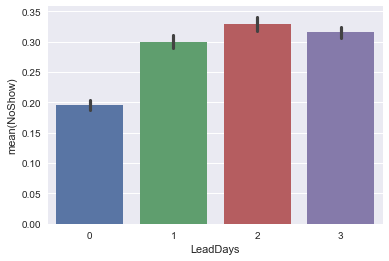

In [19]:
sns.barplot(x='LeadDays',y='NoShow',data=df)

In [20]:
from sklearn.model_selection import train_test_split

x_all = df.drop(['NoShow','csn'],axis=1)
y_all = df['NoShow']

num_test = 0.20

x_train, x_test, y_train, y_test = train_test_split(x_all, y_all,
test_size = num_test, random_state = 23)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring = acc_scorer)
grid_obj = grid_obj.fit(x_train, y_train)

clf = grid_obj.best_estimator_

clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [21]:
prob = clf.predict_proba(x_test)

In [22]:
predictions = clf.predict(x_test)
print(accuracy_score(y_test,predictions))

0.807982048405


In [23]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        x_train, x_test = x_all.values[train_index], x_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome))
    
#run_kfold(clf)

C:\Users\david\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
#y_test.head()

In [25]:
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [26]:
prob2 = np.array([i[1] for i in prob])

In [27]:
#ids = test['csn']
ids = y_test

predictions = clf.predict(x_test)

output = pd.DataFrame({'Label' : ids, 'Prediction': predictions, 'Probability': prob2 }).join(df['csn'])

output.to_csv('predictions.csv', index = False)
df.to_csv('df.csv', index=False)
#output